In [1]:
import i2v
from PIL import Image
import matplotlib.pyplot as plt
import json
from glob import glob
from tqdm import tqdm

In [2]:
attribute_list=['blonde hair','brown hair','black hair','blue hair','pink hair','purple hair','green hair','red hair','silver hair','white hair','orange hair','aqua hair','grey hair',
                'long hair','short hair',
                'twintails','drill hair','ponytail',
                'blush','smile','open mouth','hat','ribbon','glasses',
                'blue eyes','red eyes','brown eyes','green eyes','purple eyes','yellow eyes','pink eyes','aqua eyes','black eyes','orange eyes'
                ]
hair_color=['blonde hair','brown hair','black hair','blue hair','pink hair','purple hair','green hair','red hair','silver hair','white hair','orange hair','aqua hair','grey hair']
eye_color=['blue eyes','red eyes','brown eyes','green eyes','purple eyes','yellow eyes','pink eyes','aqua eyes','black eyes','orange eyes']
others=['long hair','short hair',
        'twintails','drill hair','ponytail',
        'blush','smile','open mouth','hat','ribbon','glasses'

]

  0%|          | 0/2 [00:00<?, ?it/s]/home/zyw/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 2/2 [00:02<00:00,  1.55s/it]


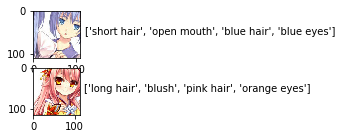

In [18]:
anime2vec=i2v.make_i2v_with_chainer("illust2vec_tag_ver200.caffemodel.1","tag_list.json")

path=glob('./get_chu_crop_face/*.jpg')
i=0
for p in tqdm(path[0:4]):
    image=Image.open(p)
    dname=p.split('/')[-1].split('.')[0]
    tags=anime2vec.estimate_specific_tags([image],attribute_list)
    
    for tag in tags:
        hair={key:prob for key,prob in tag.items() if key in hair_color}
        haircolor=max(hair,key=hair.get)
        eye={key:prob for key,prob in tag.items() if key in eye_color}
        eyecolor = max(eye, key=eye.get)
        label_simple=[key for key,prob in tag.items() if key in others and prob >0.25]+[haircolor,eyecolor]
        list=[[0]*len(attribute_list)][0]
        label_all=dict(zip(attribute_list,list))
        for l in label_simple:
              label_all[l]=1
    plt.subplot(2,1,i+1)    
    plt.imshow(image)
    plt.text(image.size[0]+10,image.size[1]/2,str(label_simple),fontsize=10)
    i=i+1
#         with open('./labels/'+dname+'.json','w+') as file_obj:
#             json.dump(label_all,file_obj)